In [51]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from src.data.data_handler import MiniBooNEDataHandler
from src.visualization.plotter import NeutrinoPlotter

handler = MiniBooNEDataHandler()
plotter = NeutrinoPlotter()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[STATUS] Using scienceplots style with LaTeX rendering


## Import Dataset & Cleaning

In [16]:
df = handler.load()

Loading data...
[STATUS] Loaded 130064 rows, 51 columns.
Signal events: 36,499
Background events: 93,565


In [17]:
df = handler.clean_data()

[SUCCESS] There are no missing values
There are in total 466 duplicated values
[SUCCESS] Dropped the duplicated values


In [18]:
df.iloc[:, :7].describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6
count,129598.000000,129598.000000,129598.000000,129598.000000,129598.000000,129598.000000,129598.000000
mean,4.848449,1.476997,127.832571,0.267711,-0.006106,0.145377,0.954790
std,4.110993,4.023424,184.418149,3.926022,3.924514,3.927013,3.943212
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,4.020000,0.882000,50.000000,0.242000,0.001240,0.086300,0.718000
50%,4.790000,1.390000,106.000000,0.272000,0.005010,0.141000,0.924000
75%,5.630000,1.950000,139.000000,0.315000,0.013200,0.213000,1.180000
max,17.100000,8.800000,4750.000000,0.737000,0.179000,0.704000,6.240000


## EDA

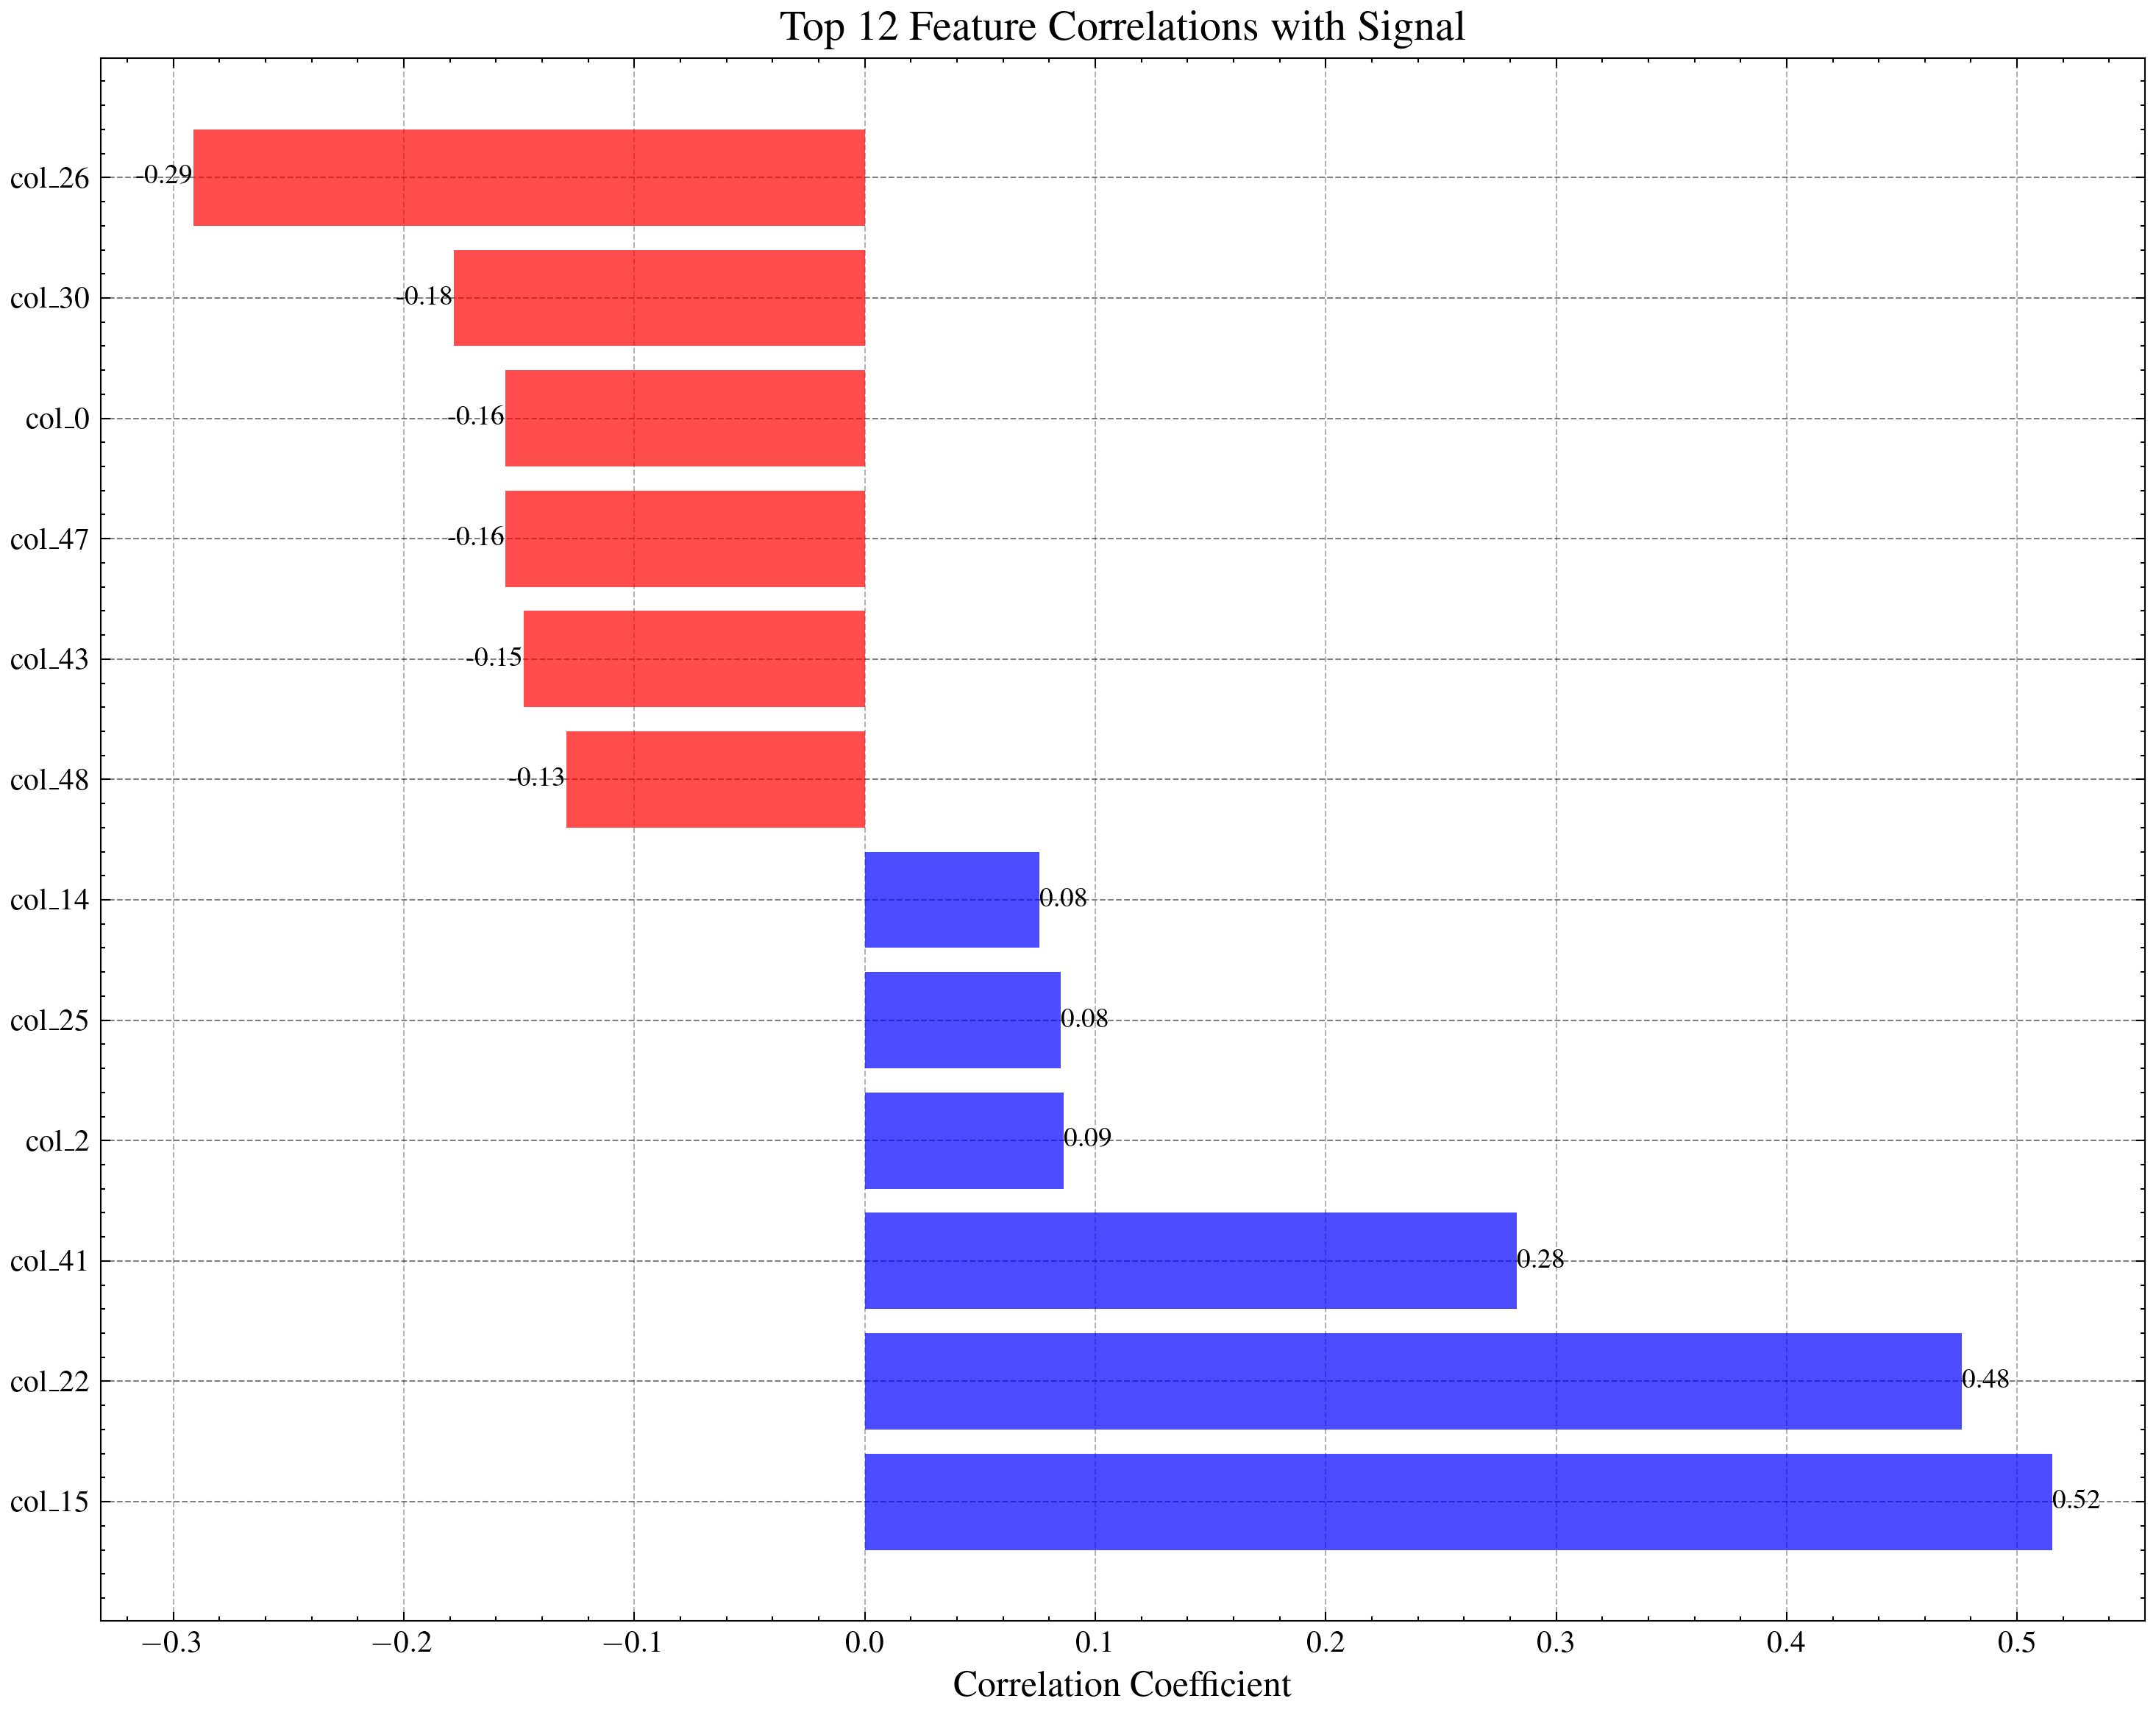

In [19]:
fig = plotter.create_correlation_barplot(df, num_features= 12)

[WARN] Limiting to first 5 features for performance


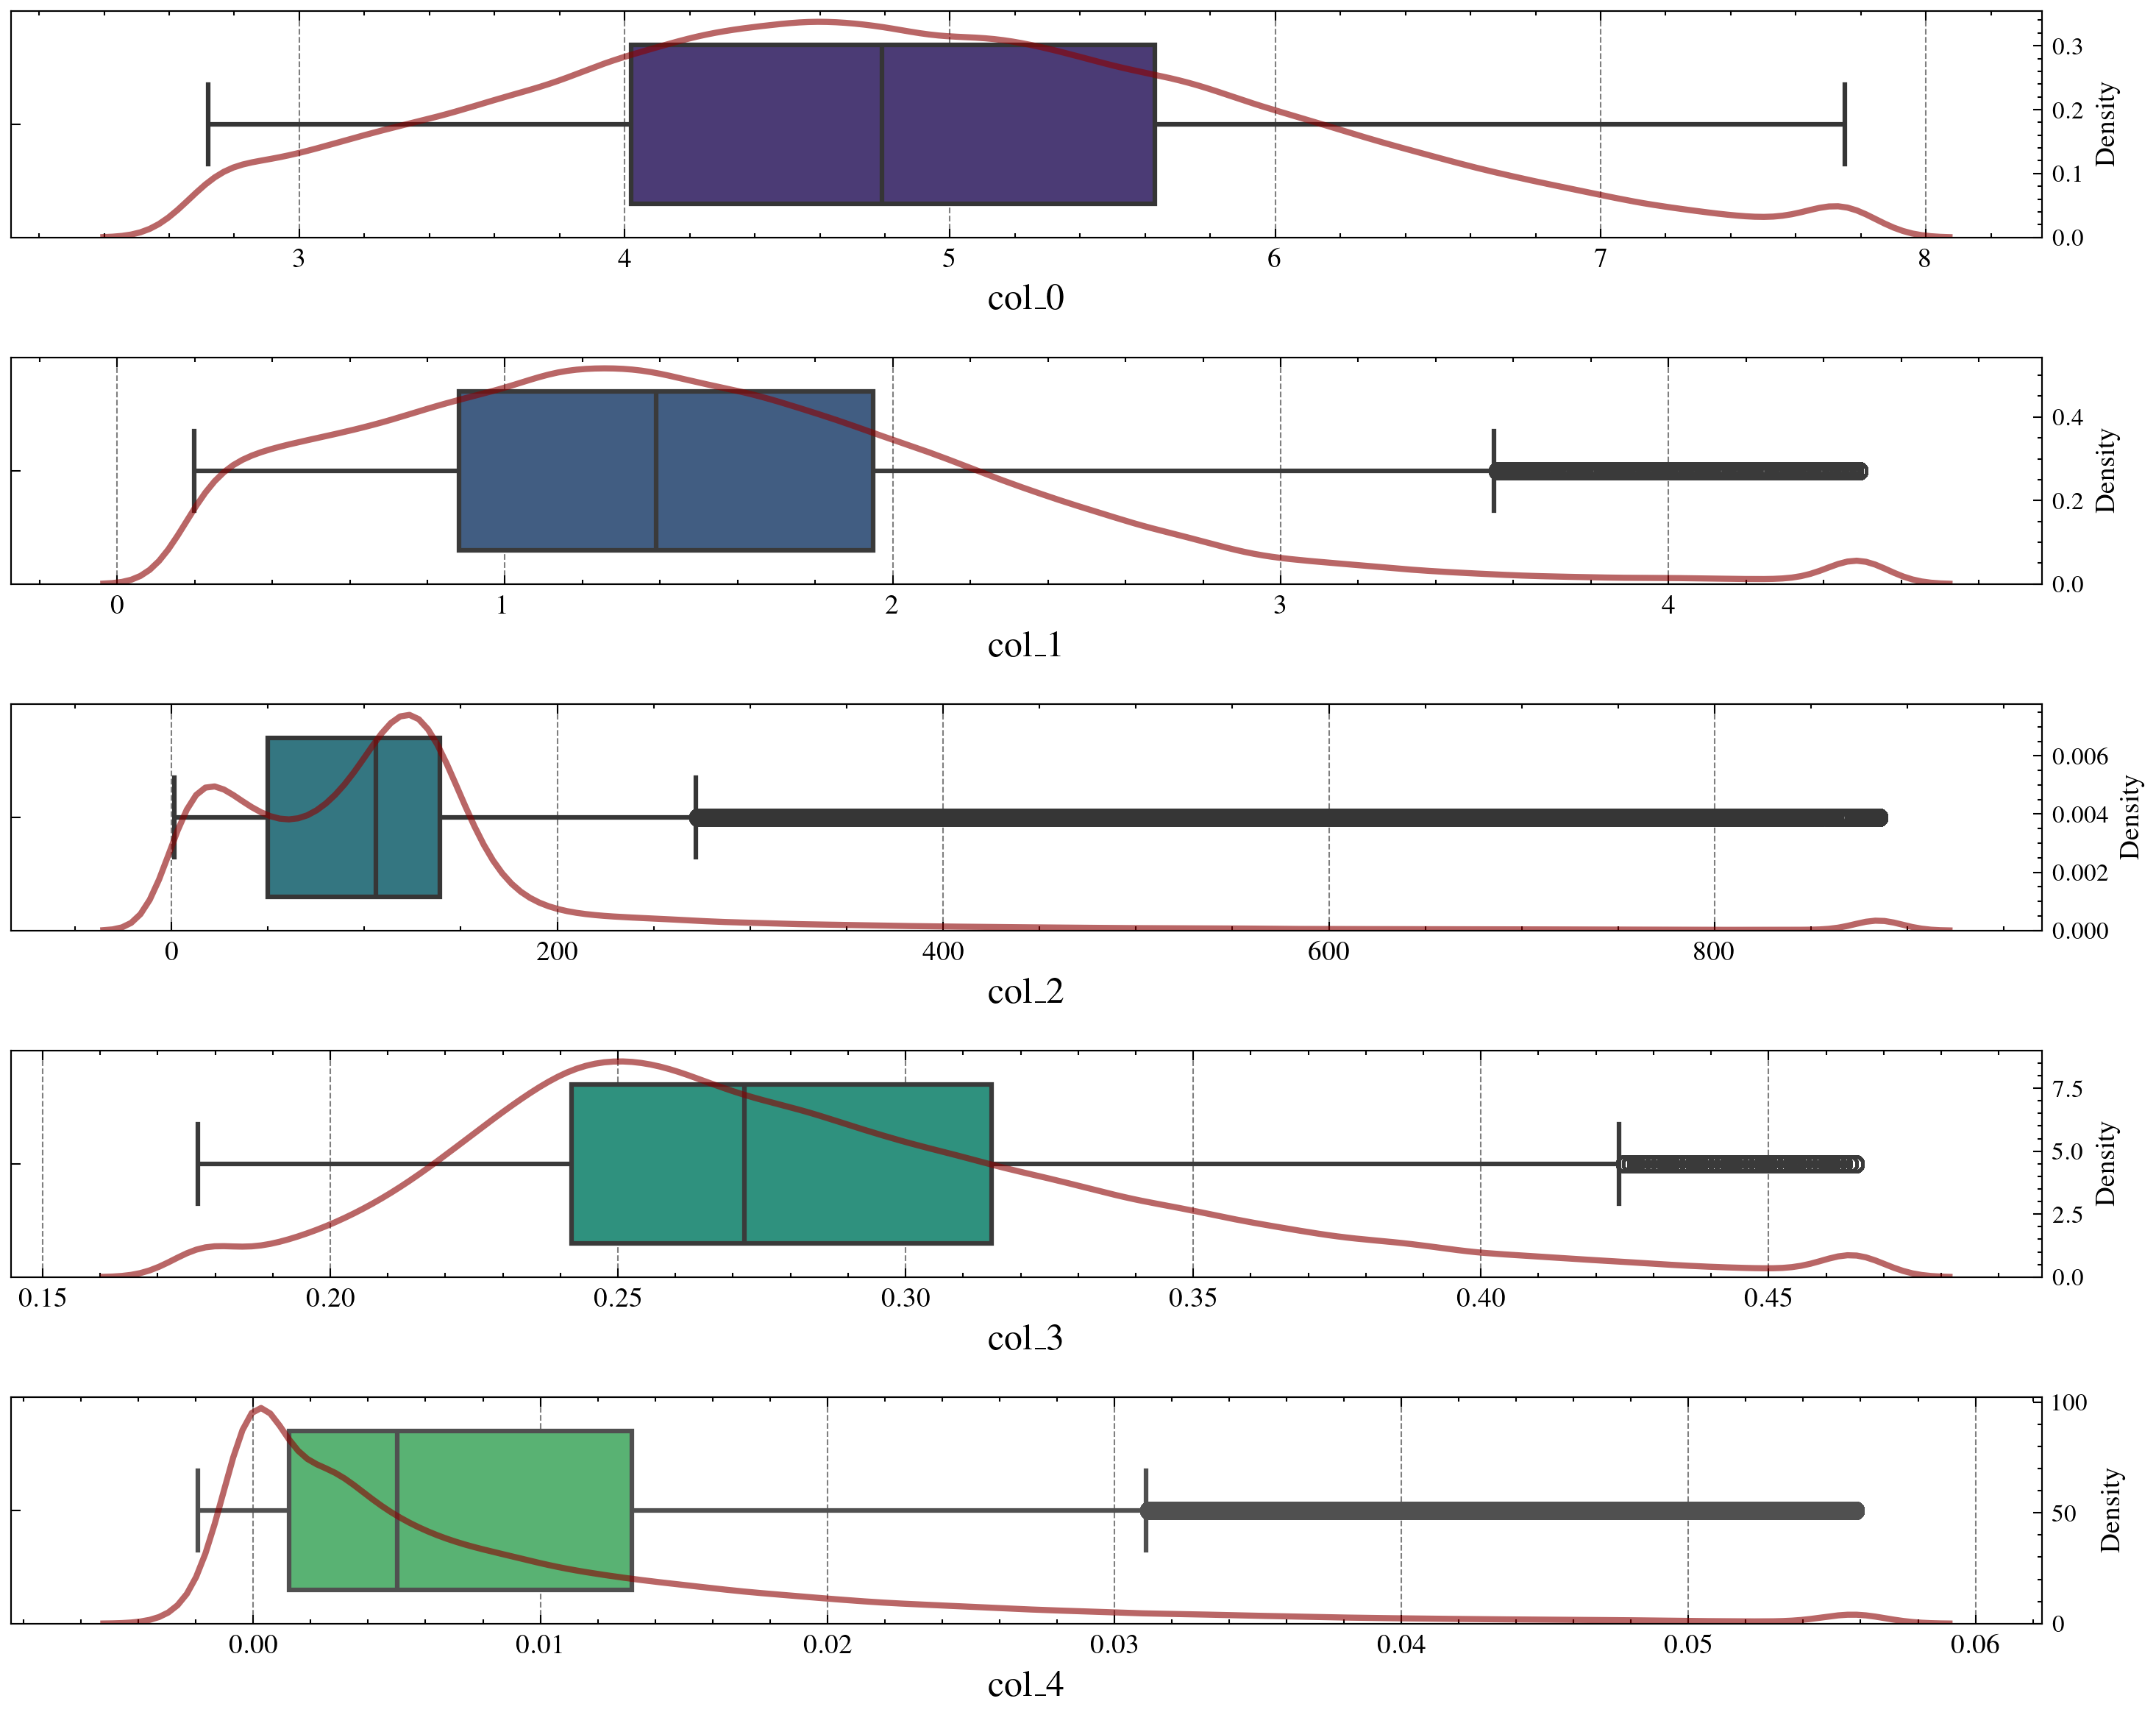

In [20]:
fig = plotter.create_horizontal_boxplot_with_density(df,max_features=5)

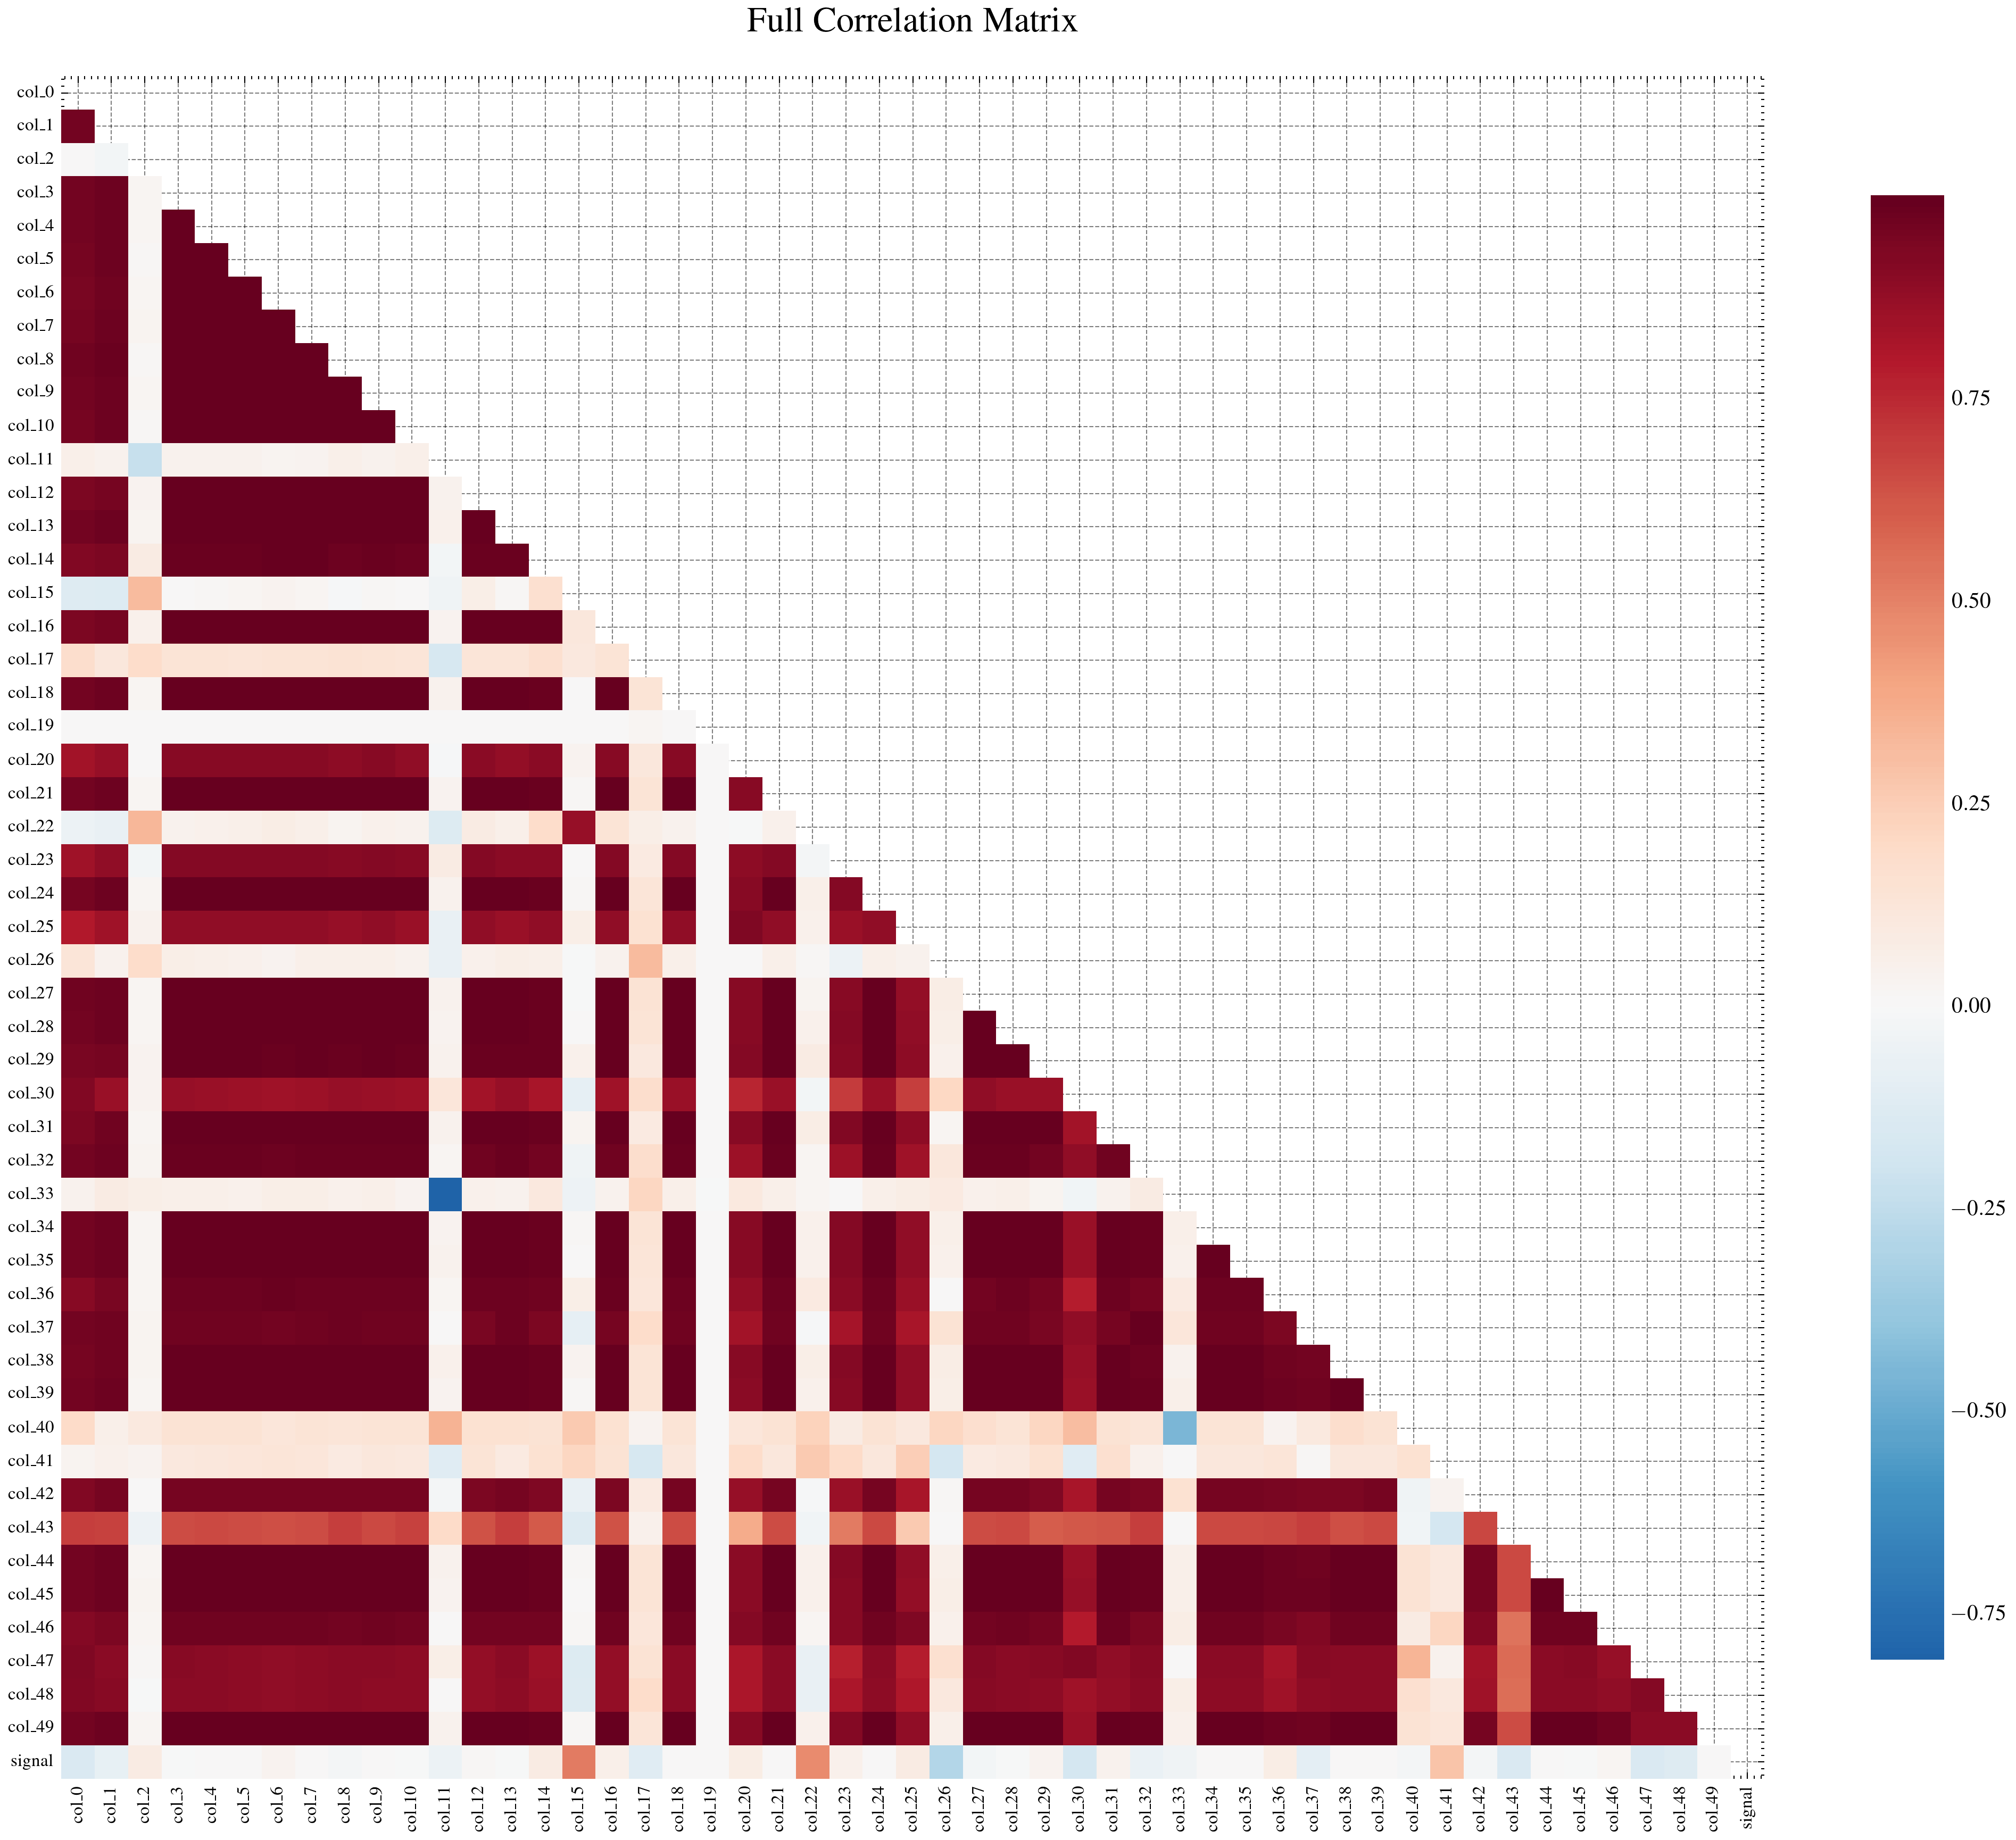

In [21]:
fig_cor = plotter.create_full_correlation_map(df)

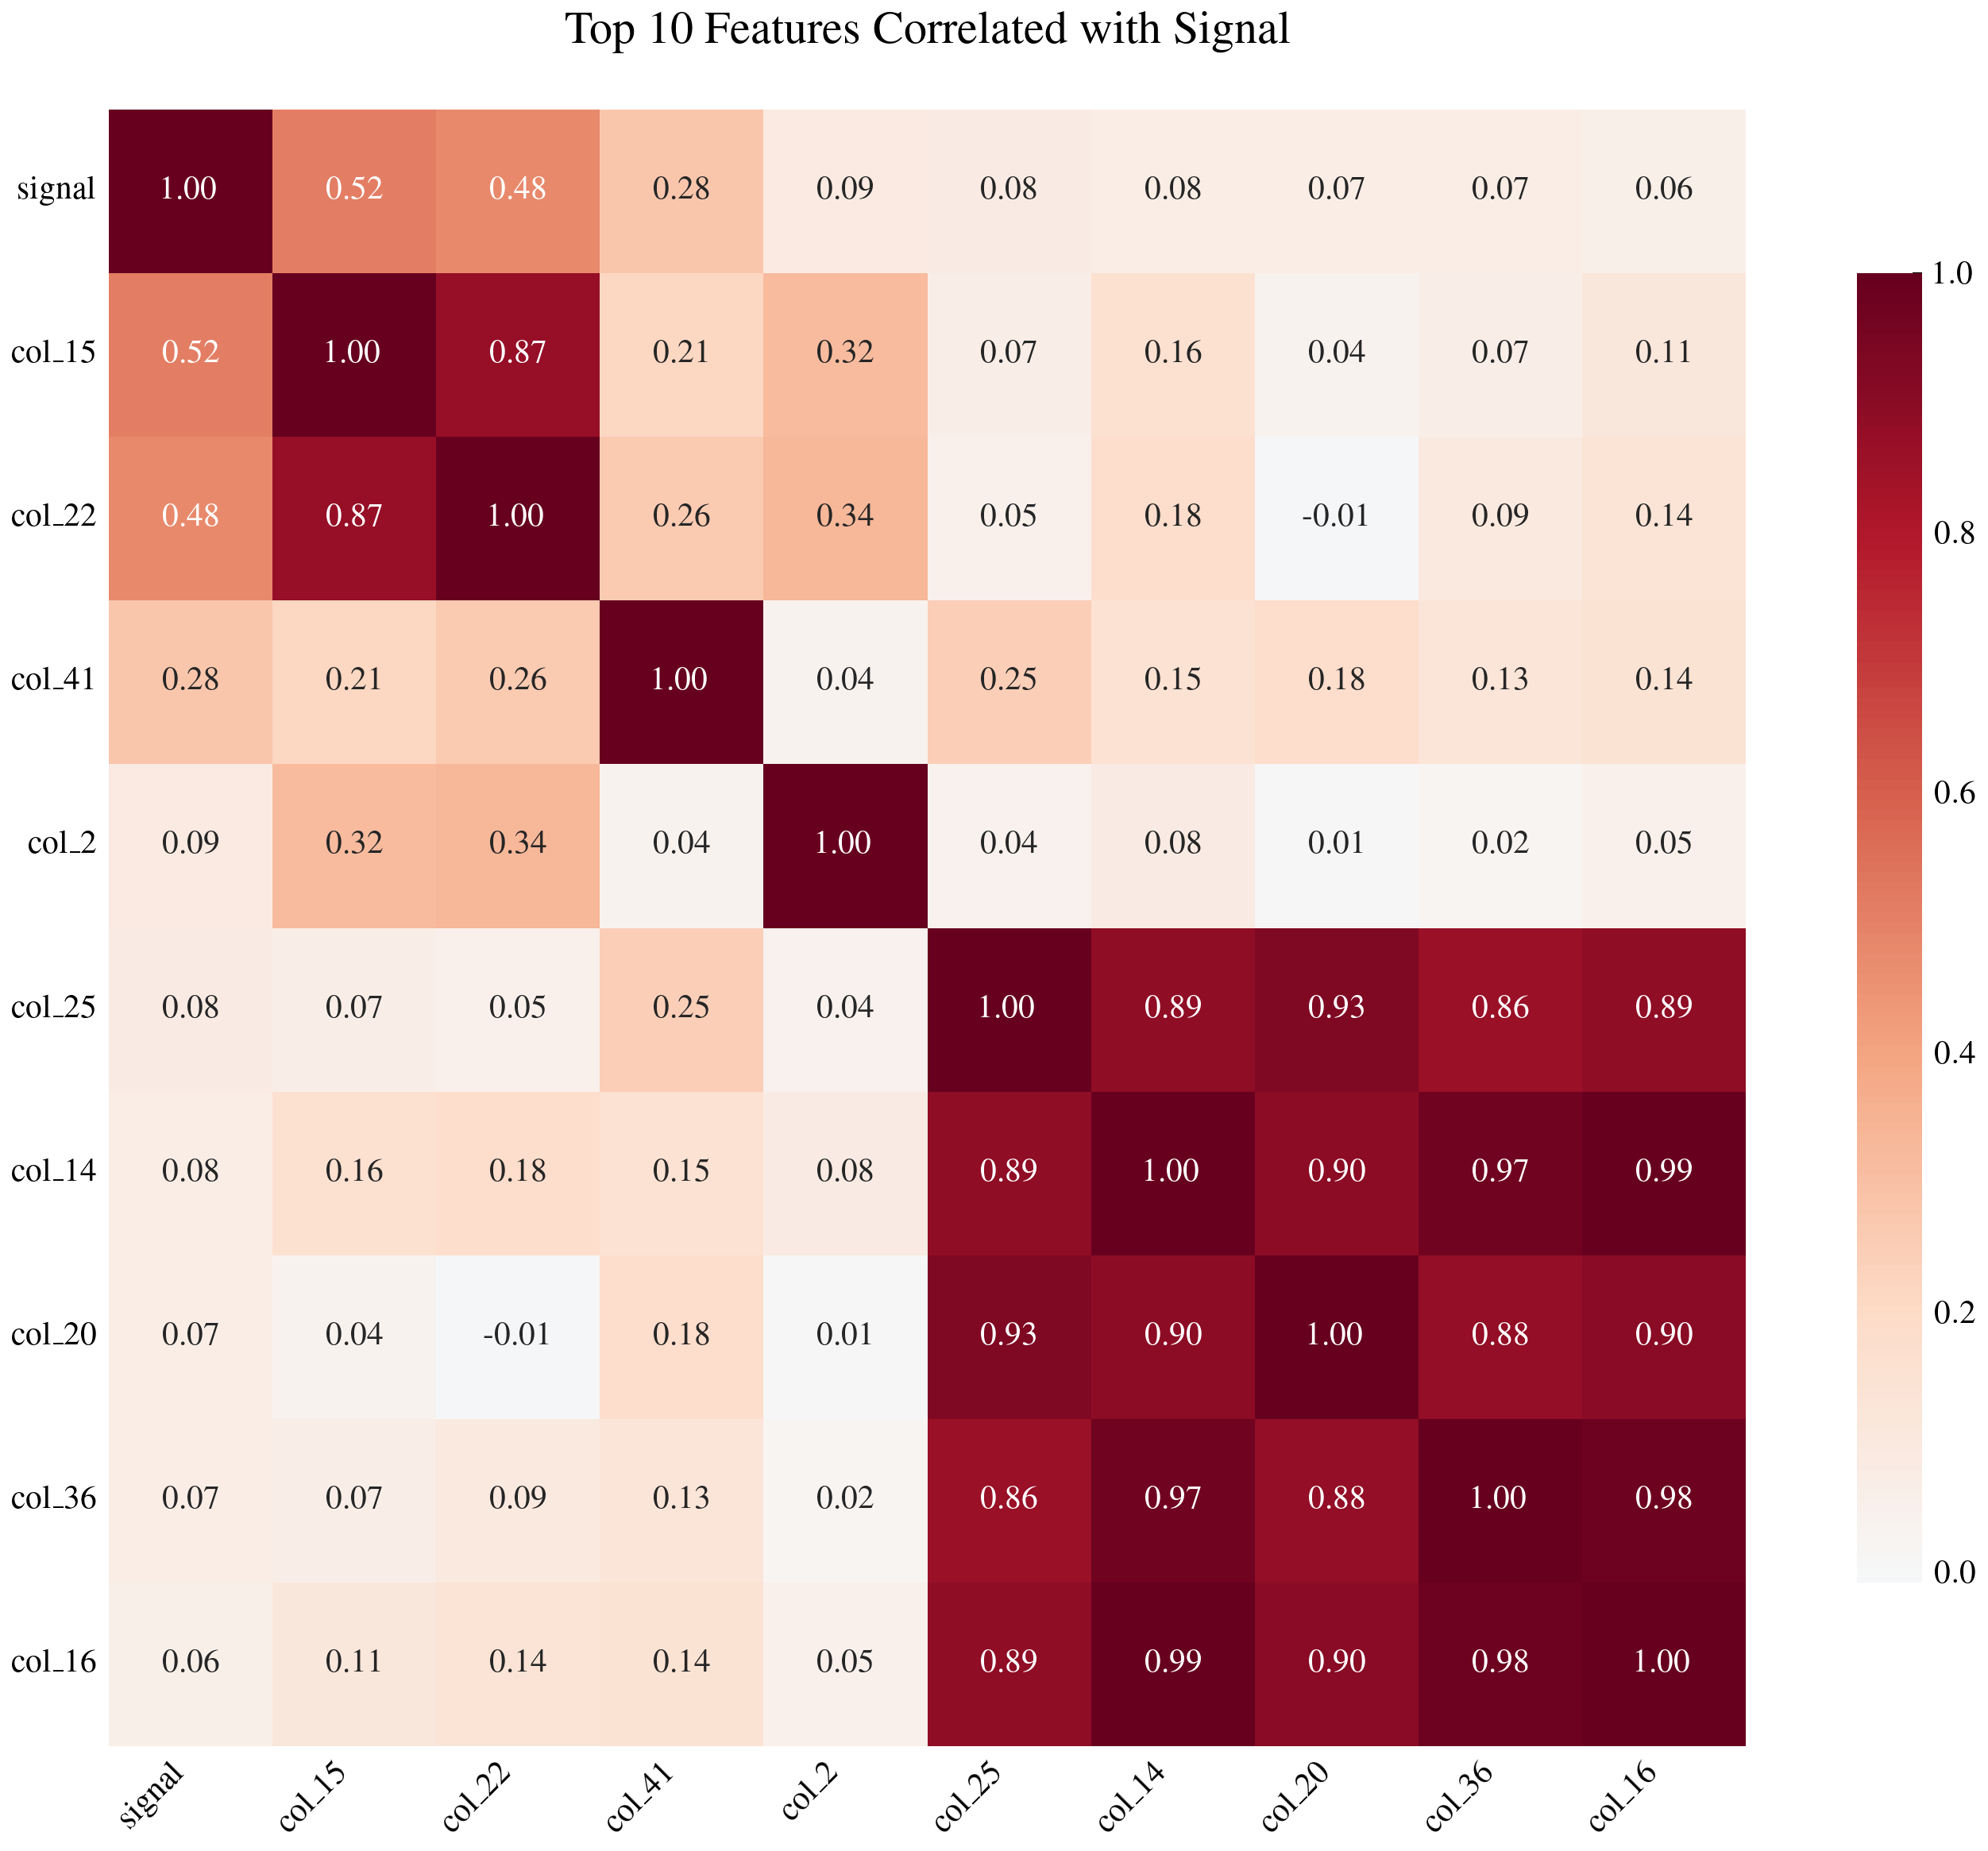

In [22]:
fig_top_corr = plotter.create_top_correlation_map(df, mask_upper=False)

Analyzing skewness for first 11 columns:
col_0                | Skewness:  -224.69 | N: 129,598
  -> Extreme skew! Using limits: [2.7200, 7.7500]
col_1                | Skewness:  -237.27 | N: 129,598
  -> Extreme skew! Using limits: [0.1990, 4.4900]
col_2                | Skewness:     8.32 | N: 129,598

Total features with extreme skewness: 2
Feature limits dictionary: {'col_0': (np.float64(2.72), np.float64(7.75)), 'col_1': (np.float64(0.199), np.float64(4.49))}
[SUCCESS] Saved: ../figures/plots/signal_background_distributions.png
[SUCCESS] Saved: ../figures/plots/signal_background_distributions.pdf


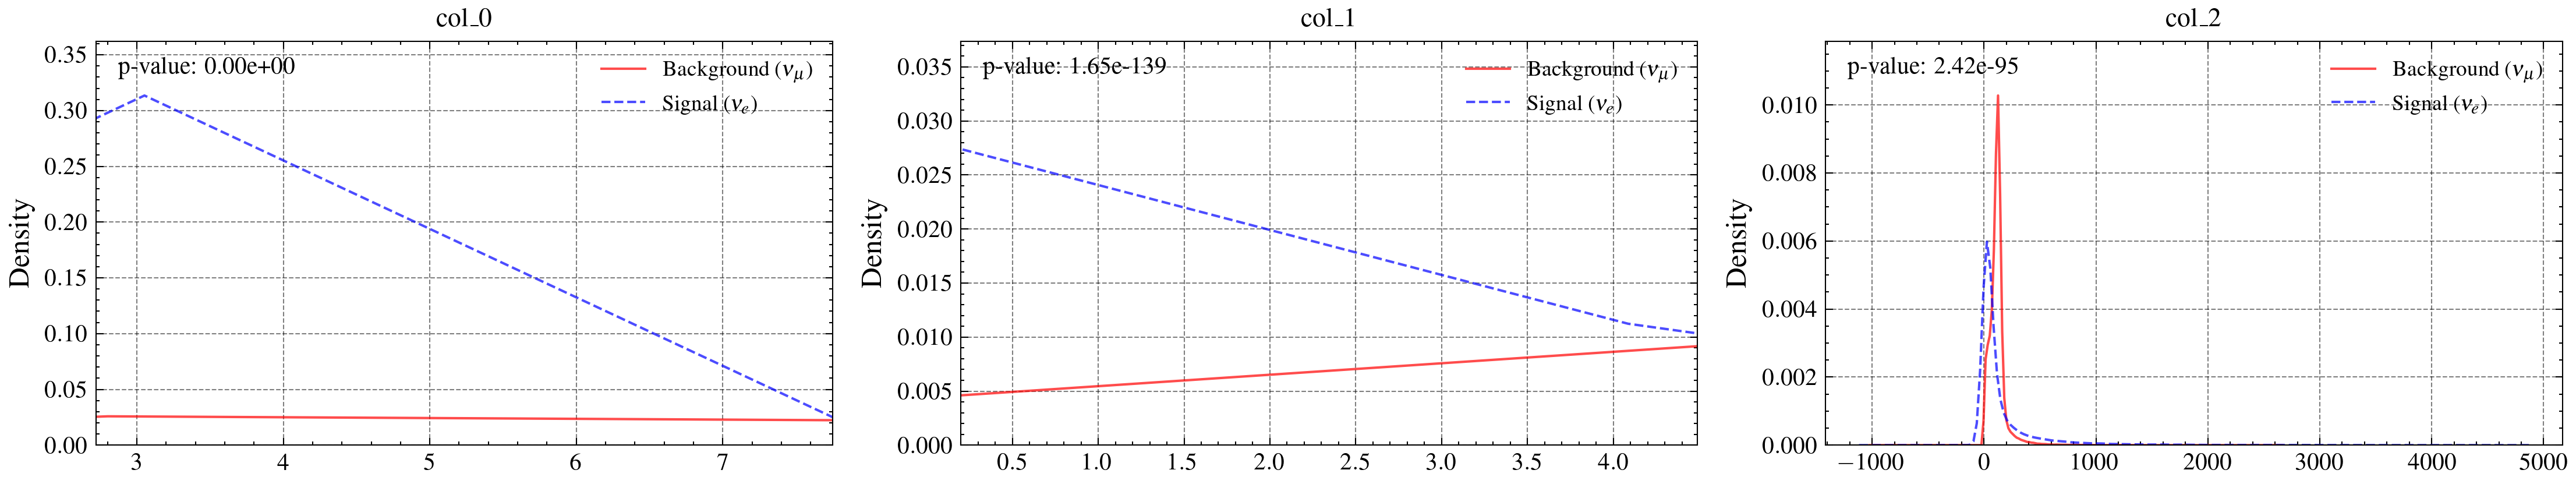

In [ ]:
feature_limits = {}
test_cols = df.columns[:3]
test_df = df[test_cols]

if 'signal' not in test_cols:
    test_cols = list(test_cols) + ['signal']
    test_df = df[test_cols]

print("Analyzing skewness for first 11 columns:")
print("=" * 50)

for col in test_cols:
    if col != 'signal':
        data = test_df[col].dropna()
        skew_val = data.skew()
        
        print(f"{col:20} | Skewness: {skew_val:8.2f} | N: {len(data):6,}")
        
        if abs(skew_val) > 10:  # Extremely skewed
            # Use 1st-99th percentiles to exclude extreme outliers
            lower = np.percentile(data, 1)
            upper = np.percentile(data, 99)
            feature_limits[col] = (lower, upper)
            print(f"  -> Extreme skew! Using limits: [{lower:.4f}, {upper:.4f}]")

print(f"\nTotal features with extreme skewness: {len(feature_limits)}")
print("Feature limits dictionary:", feature_limits)


# Create the plot
fig = plotter.create_signal_vs_background_distributions(
    df=test_df,
    feature_limits=feature_limits,
    n_cols=3
)

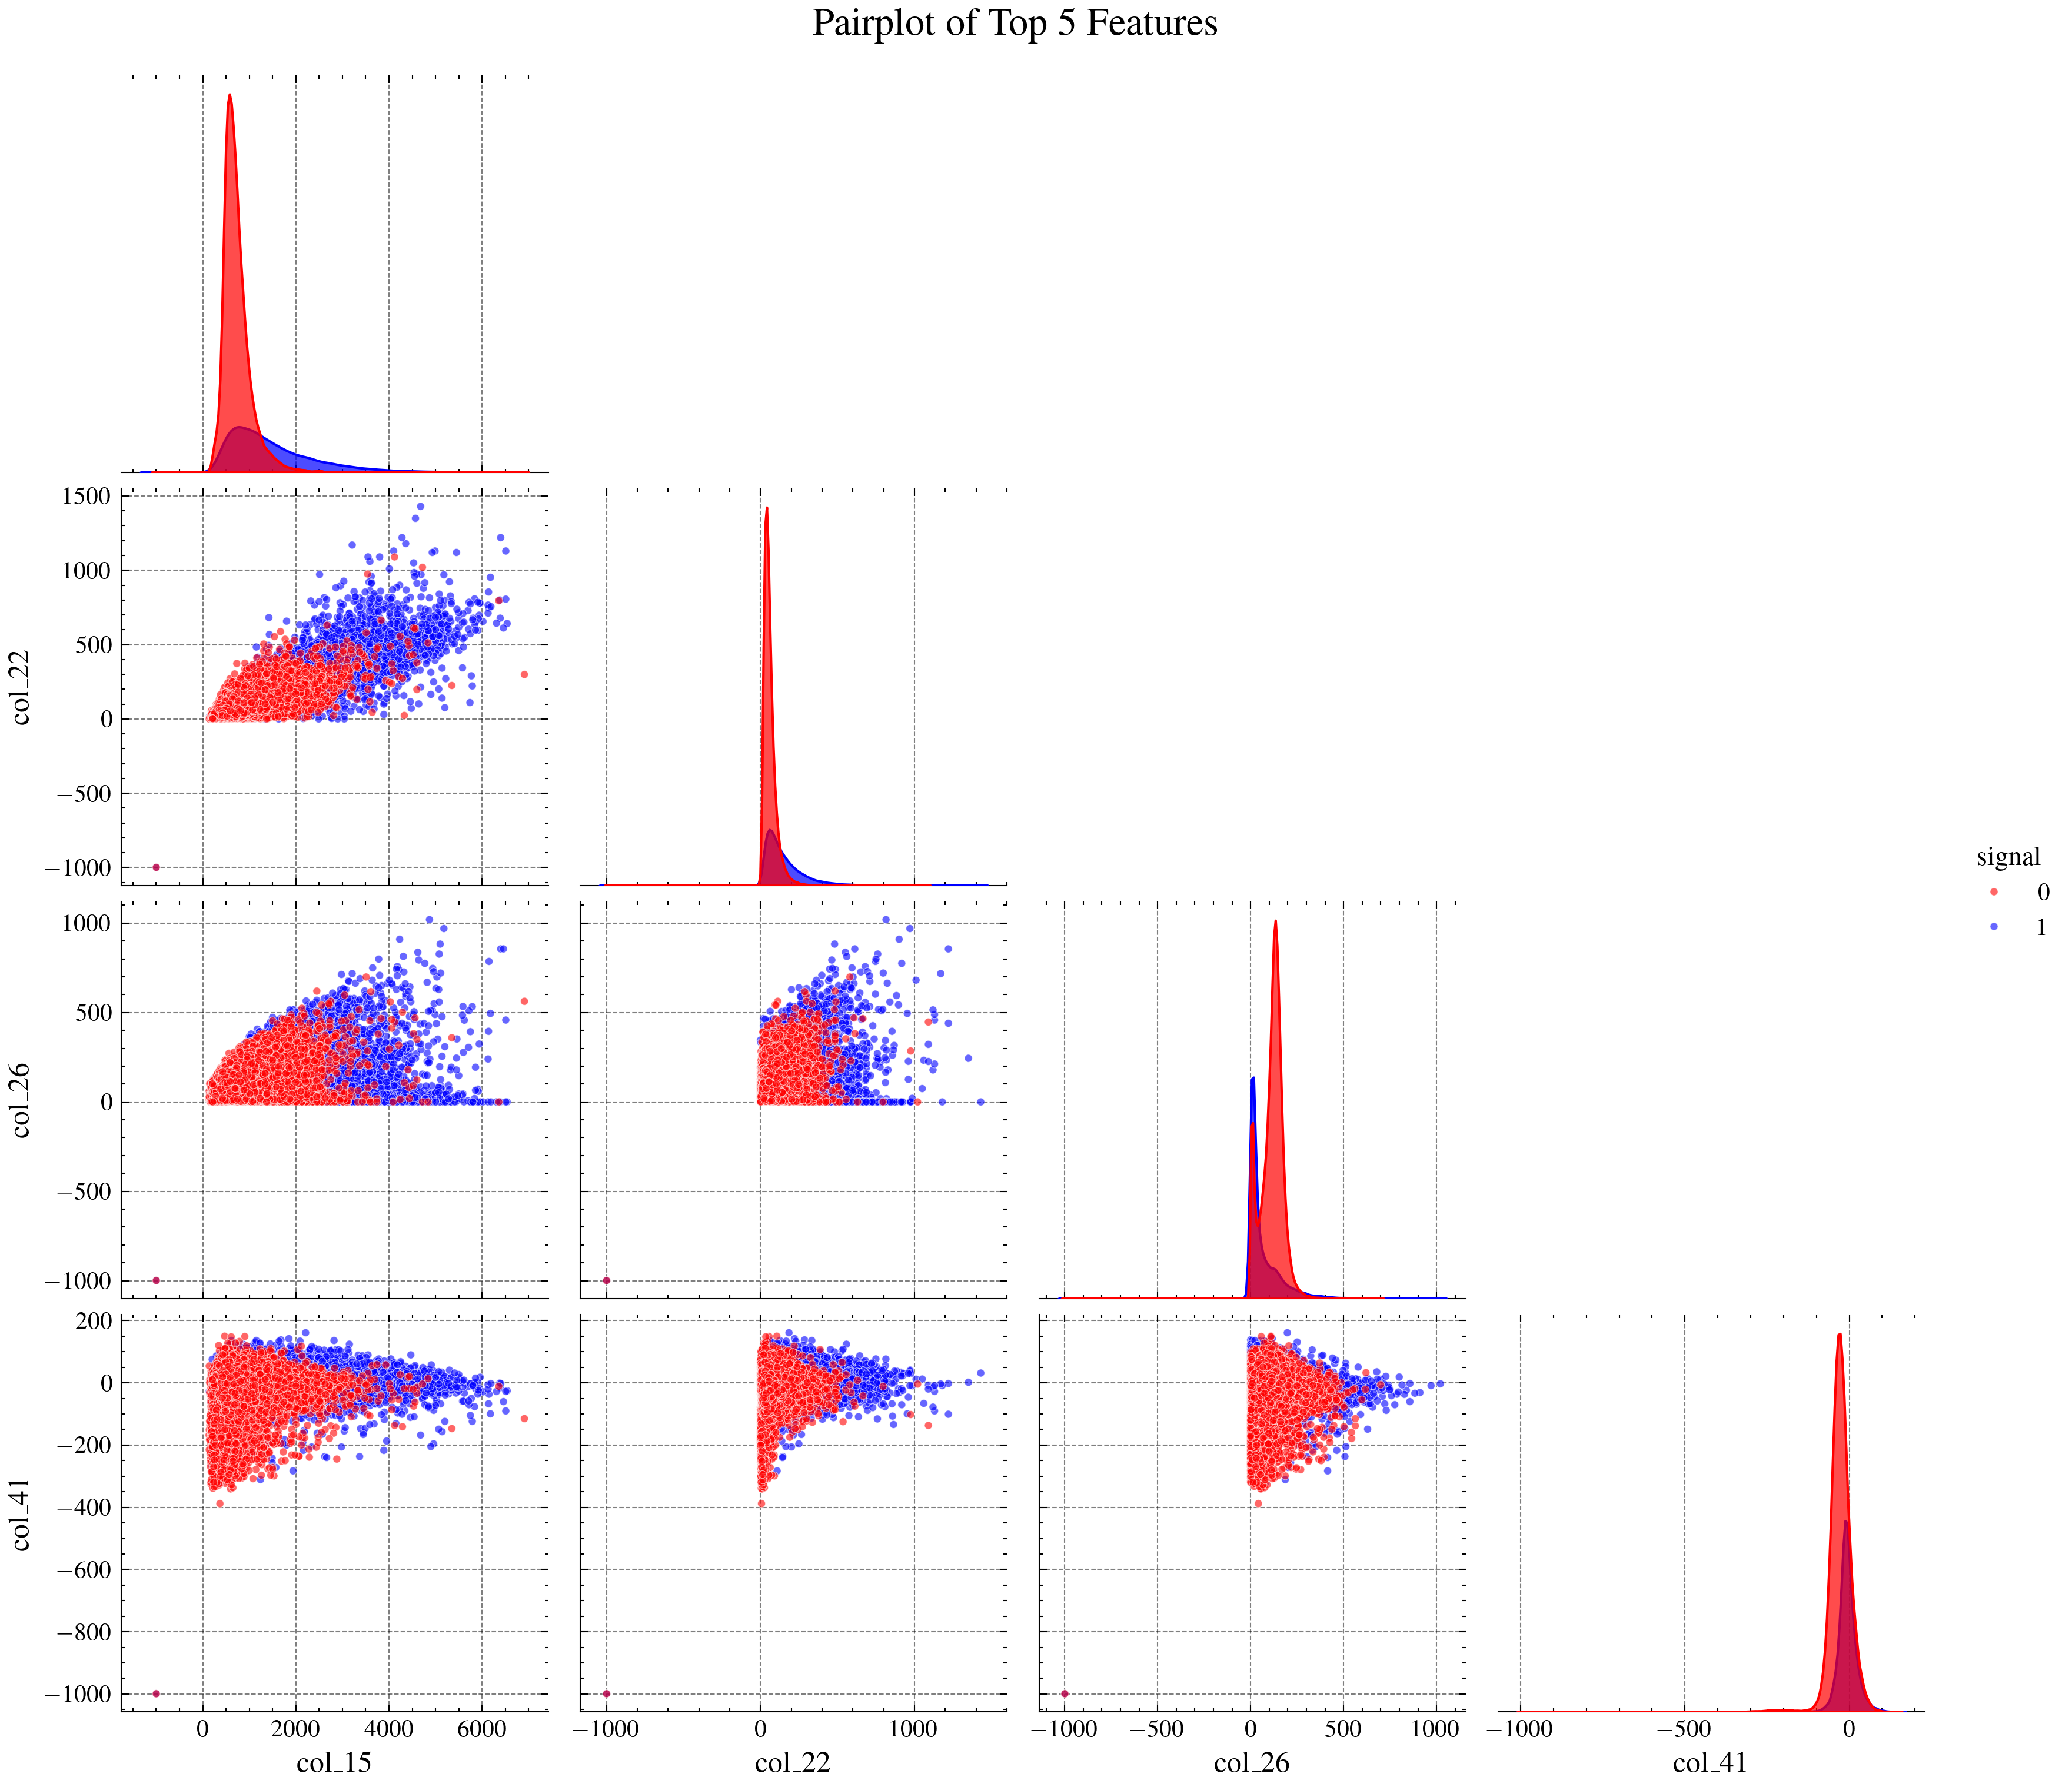

In [24]:
fig_pair = plotter.create_top_feature_pairplot(df, num_features=5)

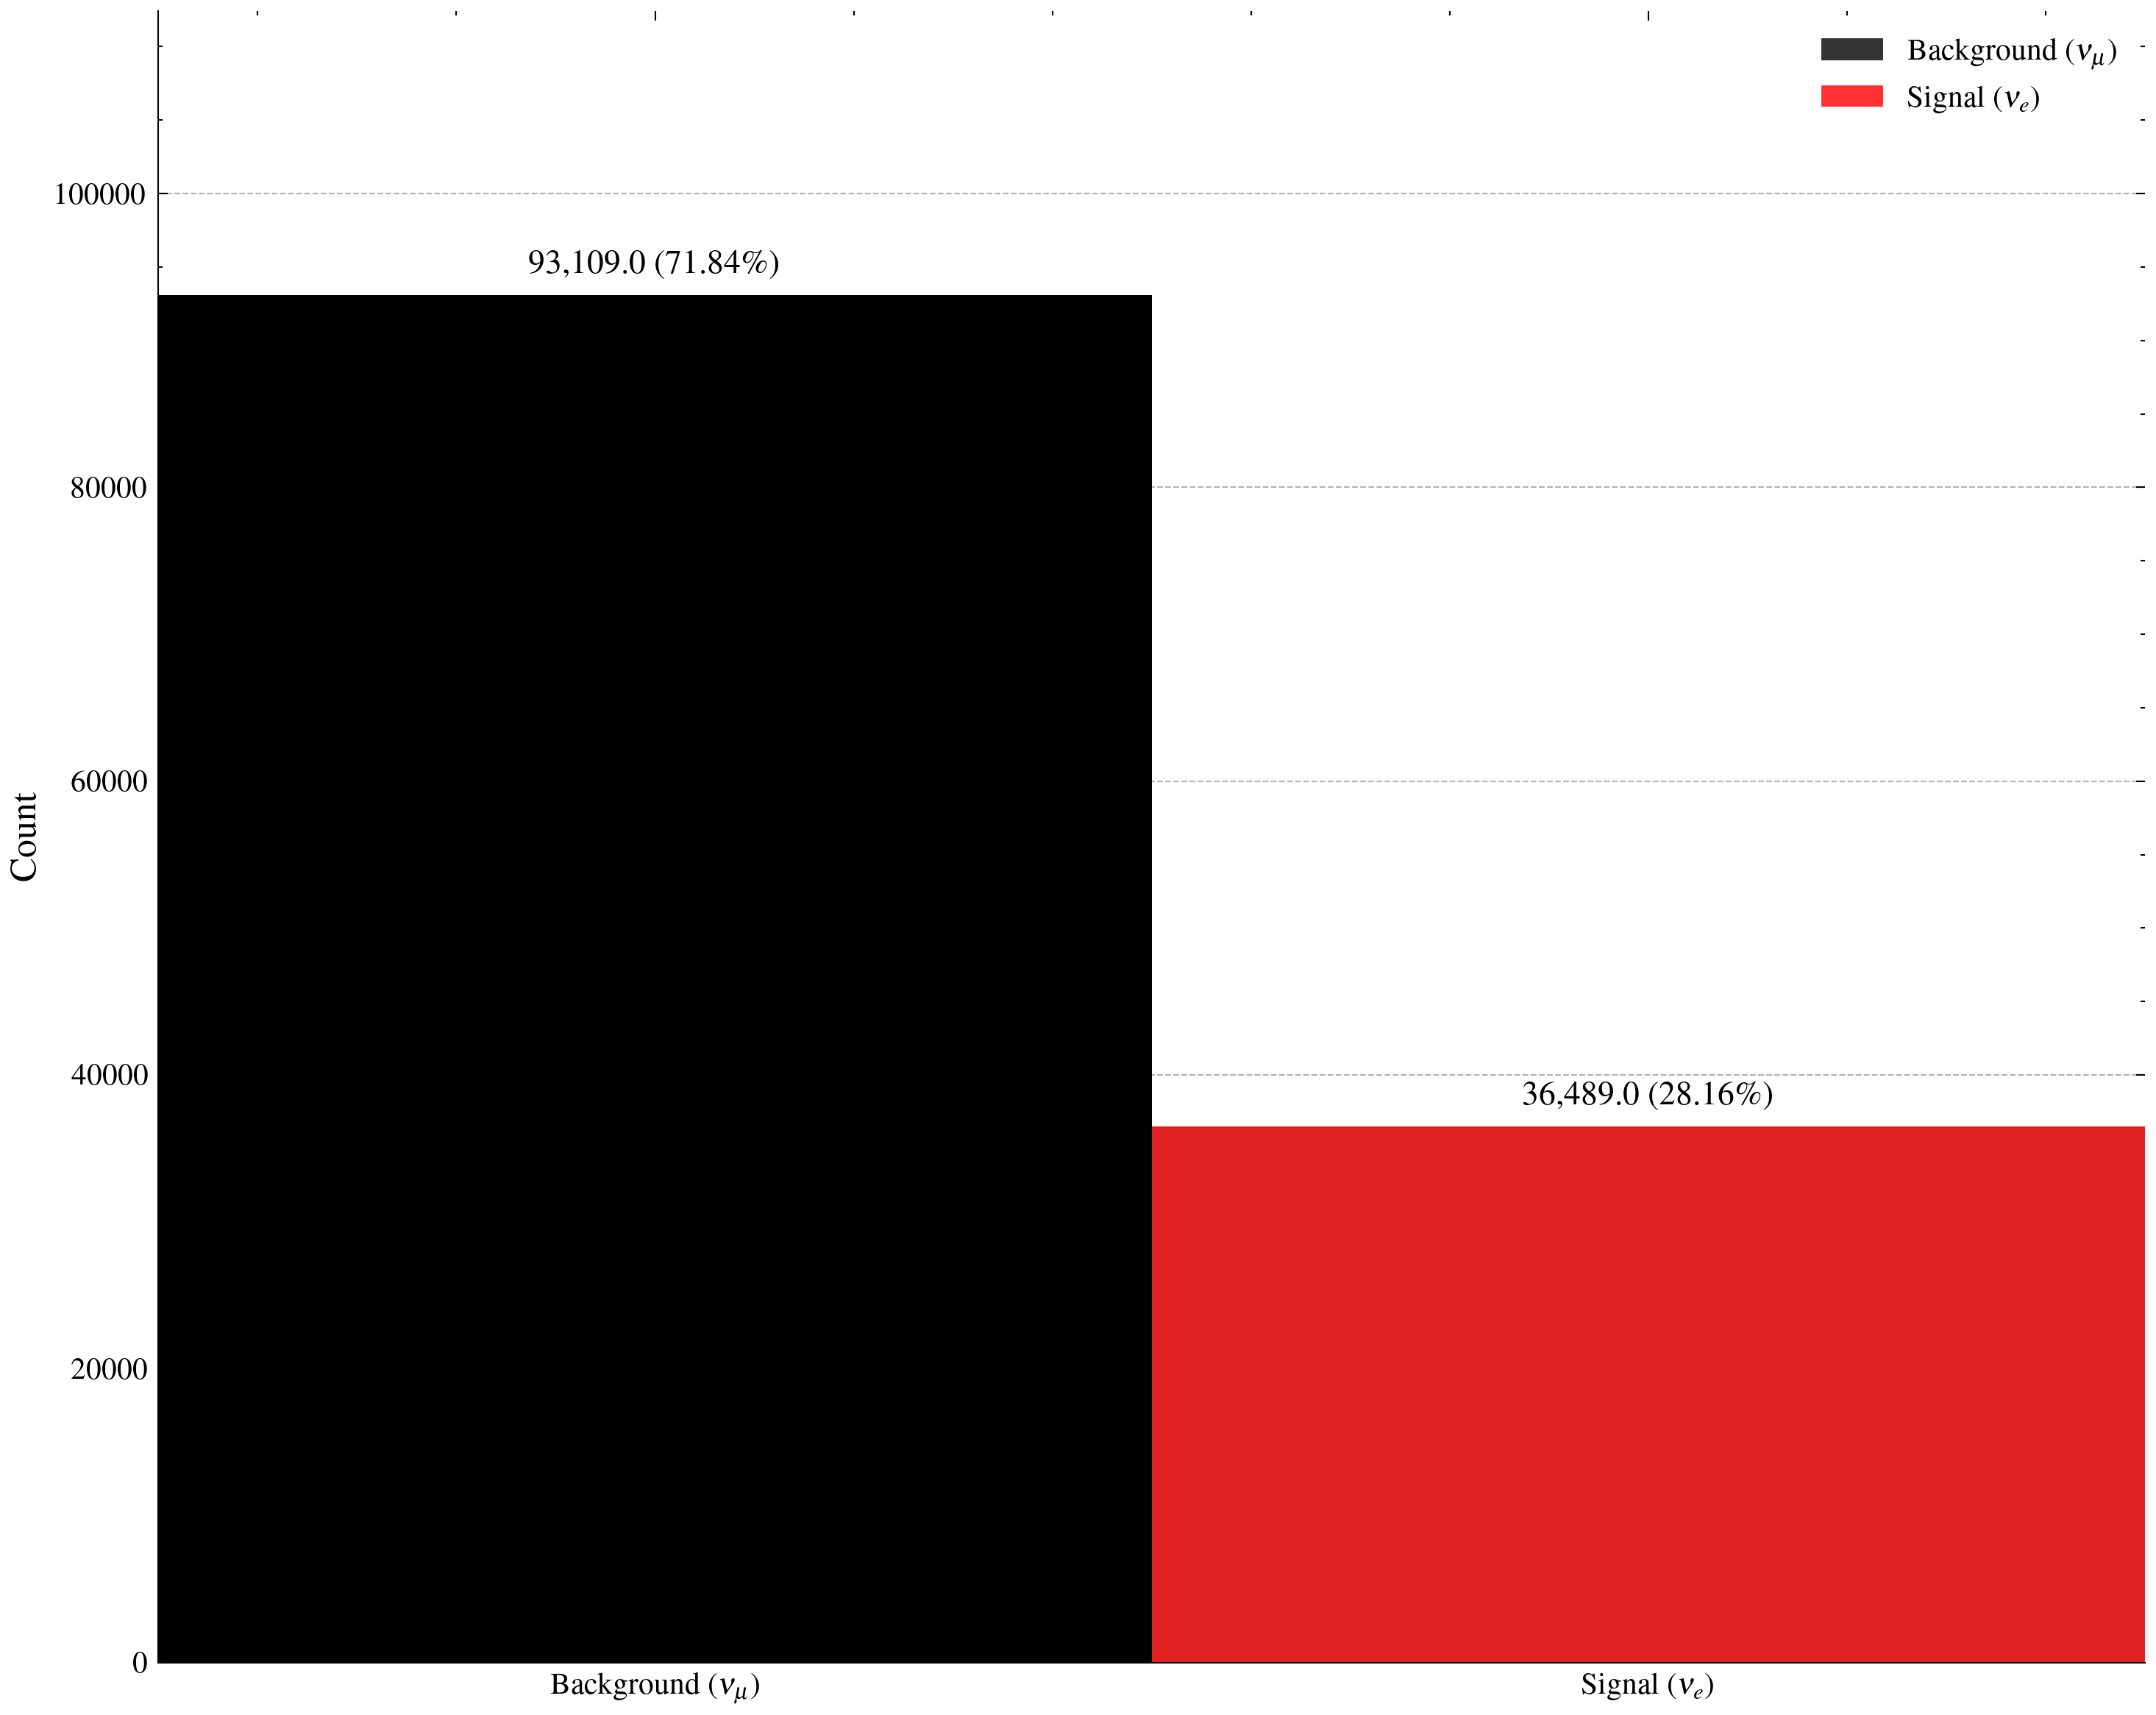

In [56]:
fig = plotter.create_target_distribution_plot(df, show_legend=True, width=1)

In [38]:
df["signal"].dtypes

dtype('int64')